# K-Means (Centroid)

K-means (MacQueen, 1967) is a partitional clustering algorithm.

- process of K-Means
1. Fix the number of clusters to K.
2. Find the best clustering according to the criterion function. (number of clusters may vary)

- feature of K-Means
1. Clustering is one of the types of unsupervised learning.
2. It is similar to classification: the aim is to give a label to each data point.
3. However, unlike in classification, we are not given any examples of labels associated with the data points. 

The K-Means algorithm partitions the given data into K clusters.
1. Each cluster has a cluster center, called centroid.
2. K is specified by the user.

***


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.datasets import make_blobs
from math import sqrt

In [2]:
class KMeans():
  def __init__(self, input_k, input_points, input_centroids):
    self.k = input_k
    self.centroids = input_centroids
    self.points = input_points
    self.output_centroids = None
    self.output_points = None
    self.prev_pts = None
    self.prev_cts = None
    self.inertia = None

  def showPlot(self):
    cts_X = np.array(self.centroids)[:, 0]
    cts_y = np.array(self.centroids)[:, 1]

    pts_X = np.array(self.points)[:, 0]
    pts_y = np.array(self.points)[:, 1]
    pts_c = np.array(self.points)[:, 2]

    plt.scatter(pts_X, pts_y, c = pts_c, alpha = 0.5)
    plt.scatter(cts_X, cts_y, c = 'red')
    plt.show()
    
  def calInertia(self): # 제곱합 = 모든 데이터를 제곱한 값의 합 - (모든 데이터를 합한 값) ** 2 / 데이터의 개수
    totalDistances = []
    for i in range(len(self.output_points)):
        index = self.output_points[i][-1]
        distance = sqrt((self.output_centroids[index][0] - self.output_points[i][0]) ** 2 + (self.output_centroids[index][1] - self.output_points[i][1]) ** 2)
        totalDistances.append([distance])
    totalDistances = np.array(totalDistances)
    ss = (totalDistances ** 2).sum() - totalDistances.sum() ** 2 / len(self.output_points)
    self.inertia = ss

  def finalizeCentroid(self):
    k = copy.deepcopy(self.k)
    pts = copy.deepcopy(self.points)
    cts = []
    for i in range(k):
      cts.append([[], []])
    
    for i in range(len(pts)):
      cts[pts[i][-1]][0].append(pts[i][0])
      cts[pts[i][-1]][1].append(pts[i][1])

    for i in range(len(cts)):
      cts[i] = [sum(cts[i][0]) / len(cts[i][0]), sum(cts[i][1]) / len(cts[i][1])]
      

    self.output_centroids = cts

  def setCentroid(self, iter = 0):

    k = copy.deepcopy(self.k)
    pts = copy.deepcopy(self.points)
    cts = copy.deepcopy(self.centroids)

#     print(f'{iter} points: {pts}')
#     print(f'{iter} centroids: {cts}')

    if iter == 0:
      print(f'iter = {iter}')
      for i in range(len(pts)):
        point_length = []
        for j in range(k):
          point_length.append(sqrt((pts[i][0] - cts[j][0]) ** 2 + (pts[i][1] - cts[j][1]) ** 2))
        nearest = point_length.index(min(point_length))
#         print(f'index = {point_length}, min index: {nearest}')
        pts[i].append(nearest)
#       print(pts)
      self.points = pts
      self.showPlot()
      self.setCentroid(iter + 1)
      self.showPlot()
    else:

      prev_pts = pts
      prev_cts = cts

      print(f'iter = {iter}')
      # 값들의 중점으로 centroid 재설정
      cts = []
      for i in range(k):
        cts.append([[], []])

#       print(f'empty cts = {cts}')

      for i in range(len(pts)):
        cts[pts[i][-1]][0].append(pts[i][0])
        cts[pts[i][-1]][1].append(pts[i][1])

#       print(f'####### cts: {cts}')

      for i in range(len(cts)):
        cts[i] = [sum(cts[i][0]) / len(cts[i][0]), sum(cts[i][1]) / len(cts[i][1])]

      self.centroids = cts

      # 재설정 된 centroid를 바탕으로 가장 가까운 거리 재검색
      for i in range(len(pts)):
        point_length = []
        for j in range(k):
          point_length.append(sqrt((pts[i][0] - cts[j][0]) ** 2 + (pts[i][1] - cts[j][1]) ** 2))
        nearest = point_length.index(min(point_length))
#         print(f'index = {point_length}, min index: {nearest}')
        pts[i][-1] = nearest
#       print(pts)
      self.points = pts
      self.showPlot()
      if cts == prev_cts:
#         print(f'*************pts = {pts}, prev_pts = {prev_pts}')
        self.finalizeCentroid()
        self.output_points = pts
        self.showPlot()
#         print(f'return value = {pts}')
        print(f'return centroids = {cts}')
        print(f'final iteration = {iter}')
        return
      self.setCentroid(iter + 1)

In [3]:
def randRange(start, end, n):
  li = []
  for i in range(n):
    print(f'least = {start}, maximum = {end}')
    li.append(np.random.randint(start, end))
  return li

In [4]:
# # X_rand = [i / 10 for i in randRange(-100, 100, 10)]
# y_rand = [i / 10 for i in randRange(-100, 100, 10)]

In [5]:
# points = []
# for i in range(len(X_rand)):
#   points.append([X_rand[i], y_rand[i]])

In [6]:
def generatePoints(n):
  points = []
  X_pts = [i / 10 for i in randRange(-100, 100, n)]
  y_pts = [i / 10 for i in randRange(-100, 100, n)]

  for i in range(len(X_pts)):
    points.append([X_pts[i], y_pts[i]])
  print(f'generated points = {points}')
  return points

In [7]:
# points

In [8]:
def generateCentroids(k, Xmin, Xmax, ymin, ymax):
  centroids = []
  X_cent = [i / 10 for i in randRange(10 * Xmin, Xmax * 10, k)]
  y_cent = [i / 10 for i in randRange(10 * ymin, ymax * 10, k)]

  for i in range(len(X_cent)):
    centroids.append([X_cent[i], y_cent[i]])
  print(f'generated centroids = {centroids}')
  return centroids

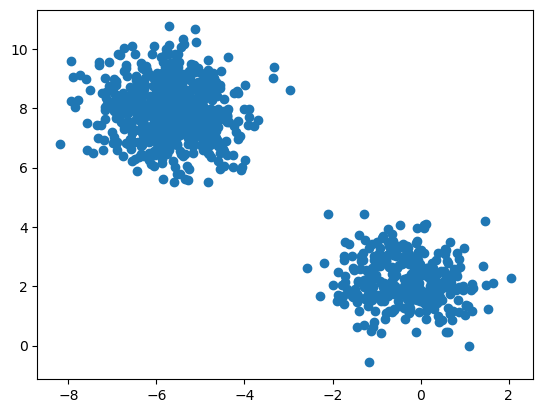

In [9]:
X, y = make_blobs(n_samples=1000, centers=np.random.randint(1, 6), cluster_std=0.8, random_state=np.random.randint(0, 11))
plt.scatter(X[:,0], X[:,1])

In [10]:
X

array([[-0.23661475,  1.25985203],
       [-5.10976657,  8.2920579 ],
       [-4.72959608,  7.69148762],
       ...,
       [-5.83851501,  7.58586416],
       [-6.7800246 ,  8.46092549],
       [-1.26961466,  1.58458507]])

In [11]:
# while True:
#   try:
#     cent = generateCentroids(3, X[:, 0].min(), X[:, 0].max())
#     X = X.tolist()
#     model = KMeans(3, X, cent)
#     model.setCentroid()
#     break
#   except:
#     continue

In [12]:
X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()

(-8.187268936306536, 2.05123878539762, -0.5711024361711026, 10.75734189867406)

In [13]:
cent = generateCentroids(3, X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max())
# cent = [[2.7, 2.4], [2.7, 2.6], [2.7, 2.5]]
# X = X.tolist()
model = KMeans(3, X, cent)
cent

least = -81.87268936306536, maximum = 20.5123878539762
least = -81.87268936306536, maximum = 20.5123878539762
least = -81.87268936306536, maximum = 20.5123878539762
least = -5.711024361711026, maximum = 107.57341898674059
least = -5.711024361711026, maximum = 107.57341898674059
least = -5.711024361711026, maximum = 107.57341898674059
generated centroids = [[-1.0, 0.1], [-7.0, 6.0], [-6.7, 4.1]]


[[-1.0, 0.1], [-7.0, 6.0], [-6.7, 4.1]]

least = -81.87268936306536, maximum = 20.5123878539762
least = -5.711024361711026, maximum = 107.57341898674059
generated centroids = [[0.5, 2.7]]
iter = 0


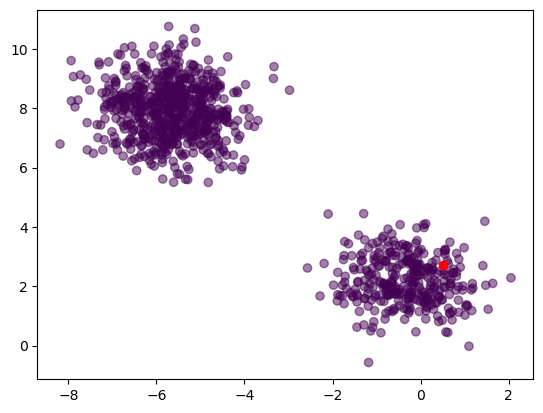

iter = 1


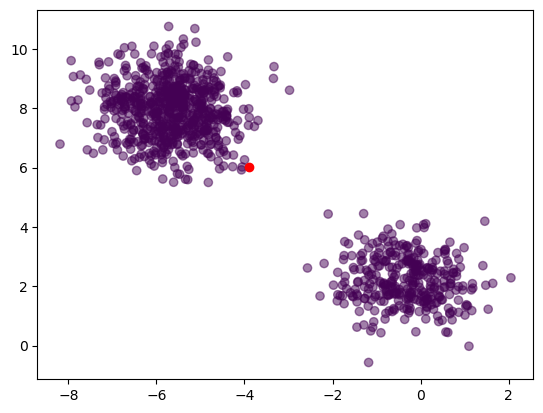

iter = 2


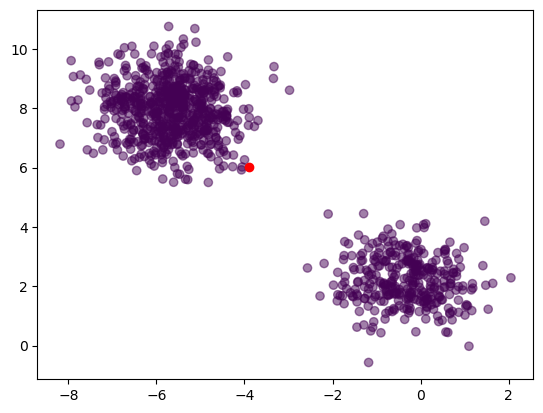

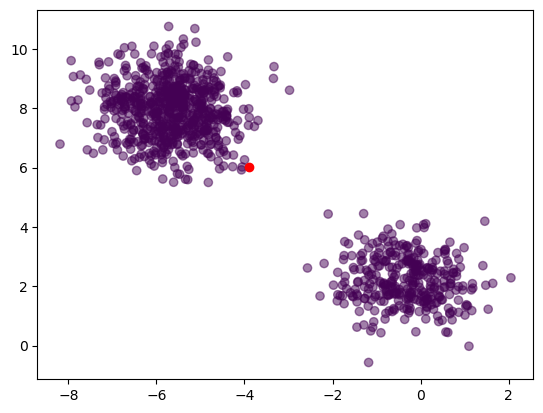

return centroids = [[-3.8897912159121724, 6.024763776239125]]
final iteration = 2


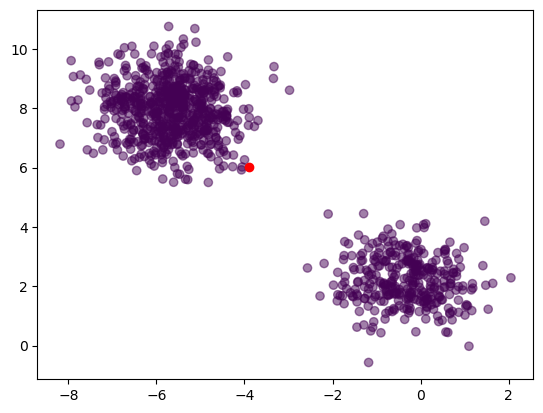

least = -81.87268936306536, maximum = 20.5123878539762
least = -81.87268936306536, maximum = 20.5123878539762
least = -5.711024361711026, maximum = 107.57341898674059
least = -5.711024361711026, maximum = 107.57341898674059
generated centroids = [[-7.7, 9.3], [-3.8, 3.5]]
iter = 0


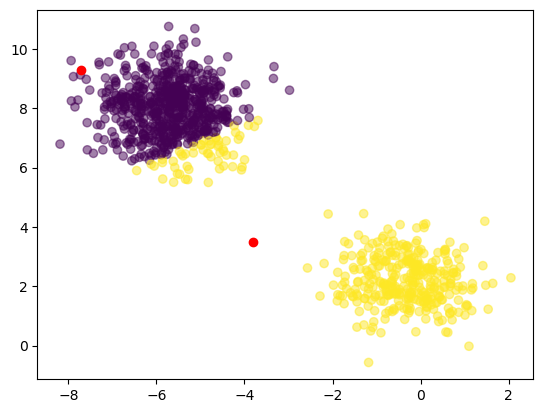

iter = 1


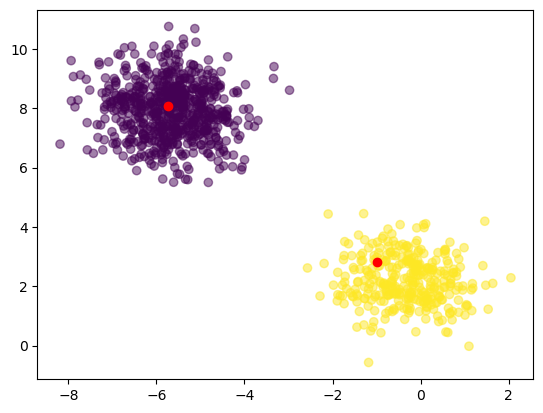

iter = 2


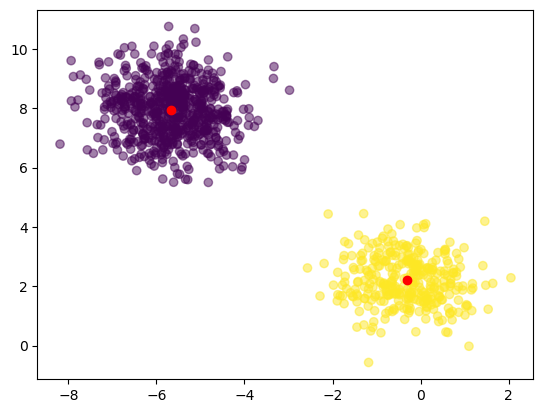

iter = 3


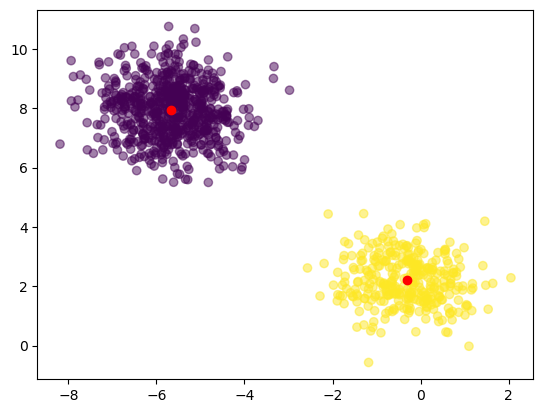

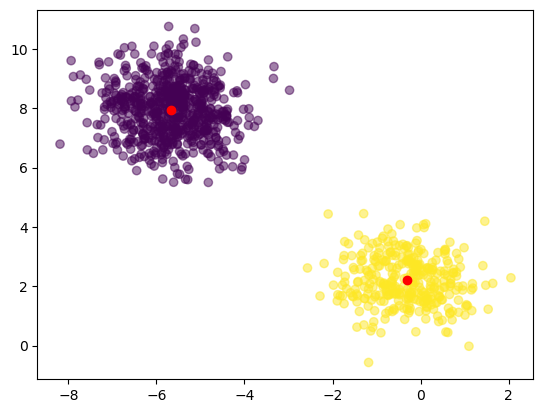

return centroids = [[-5.672181174182939, 7.9342940159355955], [-0.319658776973429, 2.199968971802067]]
final iteration = 3


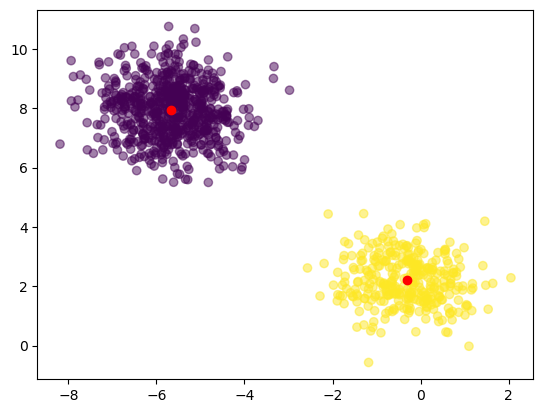

least = -81.87268936306536, maximum = 20.5123878539762
least = -81.87268936306536, maximum = 20.5123878539762
least = -81.87268936306536, maximum = 20.5123878539762
least = -5.711024361711026, maximum = 107.57341898674059
least = -5.711024361711026, maximum = 107.57341898674059
least = -5.711024361711026, maximum = 107.57341898674059
generated centroids = [[-7.7, 5.1], [-1.8, 0.3], [-7.8, 9.2]]
iter = 0


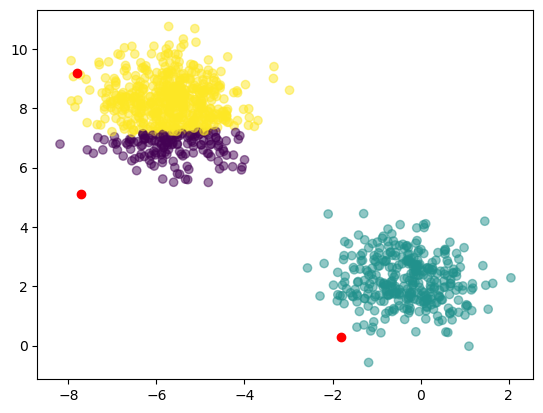

iter = 1


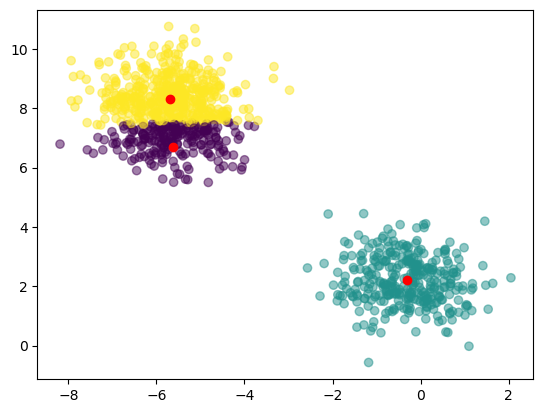

iter = 2


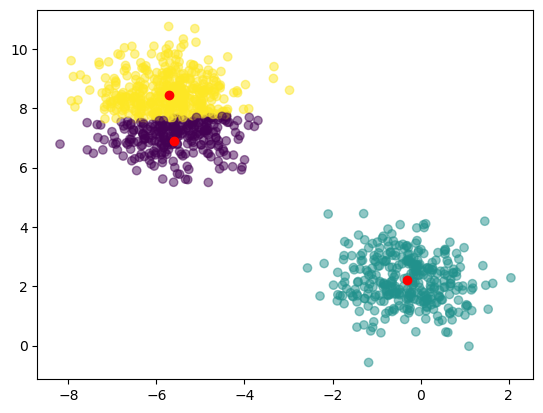

iter = 3


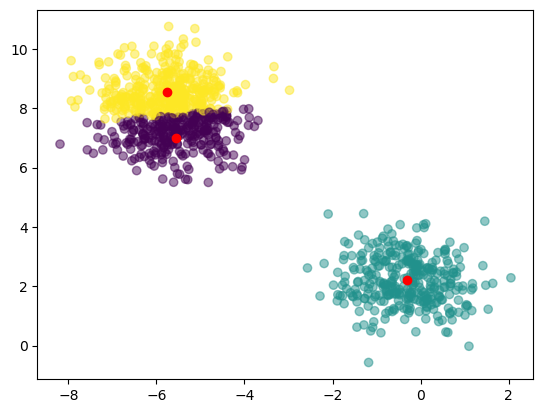

iter = 4


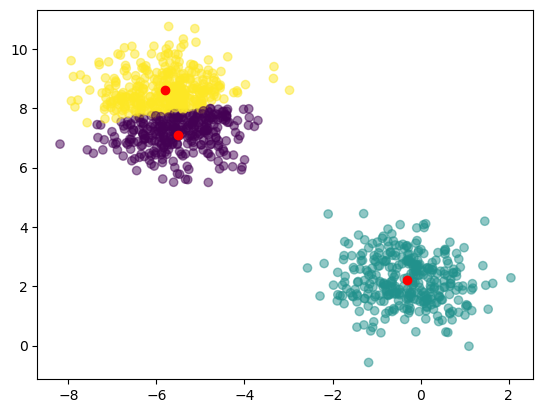

iter = 5


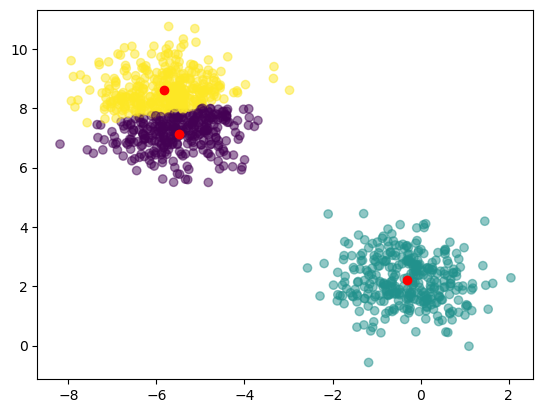

iter = 6


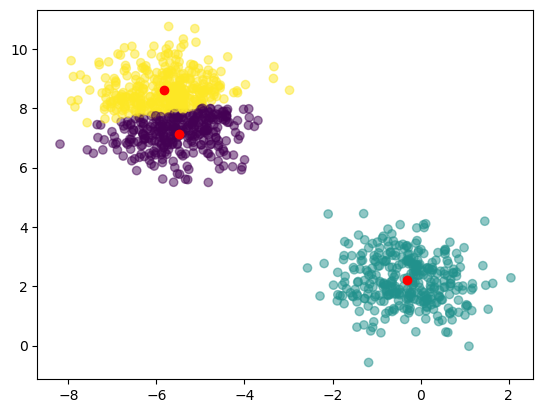

iter = 7


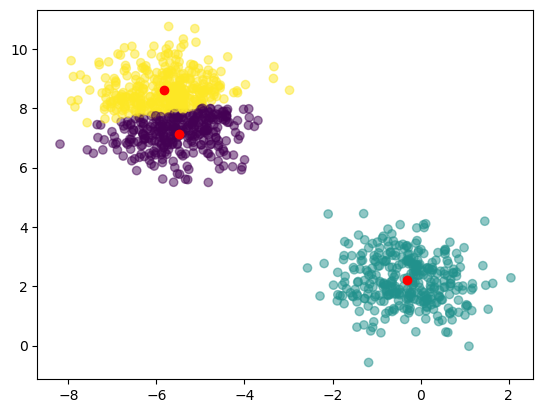

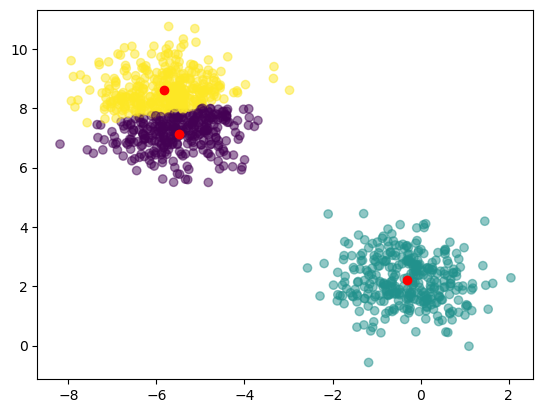

return centroids = [[-5.488671113998336, 7.125715839122681], [-0.319658776973429, 2.199968971802067], [-5.829621560079481, 8.628004540889302]]
final iteration = 7


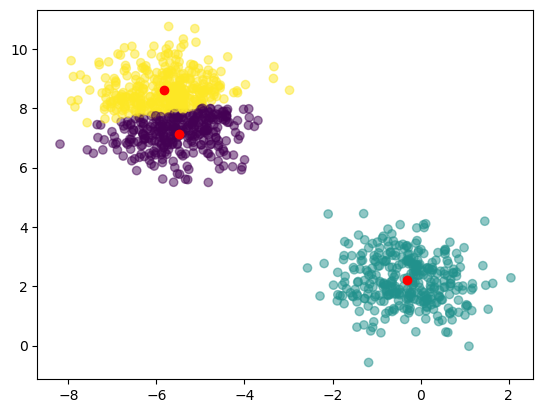

least = -81.87268936306536, maximum = 20.5123878539762
least = -81.87268936306536, maximum = 20.5123878539762
least = -81.87268936306536, maximum = 20.5123878539762
least = -81.87268936306536, maximum = 20.5123878539762
least = -5.711024361711026, maximum = 107.57341898674059
least = -5.711024361711026, maximum = 107.57341898674059
least = -5.711024361711026, maximum = 107.57341898674059
least = -5.711024361711026, maximum = 107.57341898674059
generated centroids = [[-6.0, 1.8], [-6.3, 2.1], [-2.6, 10.2], [-1.9, 6.5]]
iter = 0


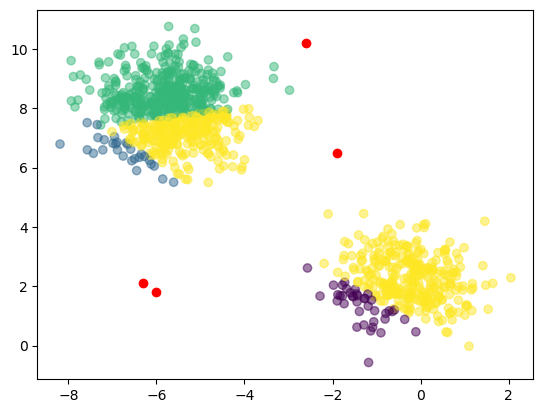

iter = 1


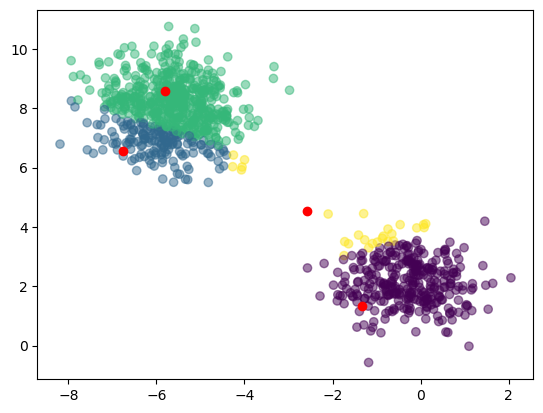

iter = 2


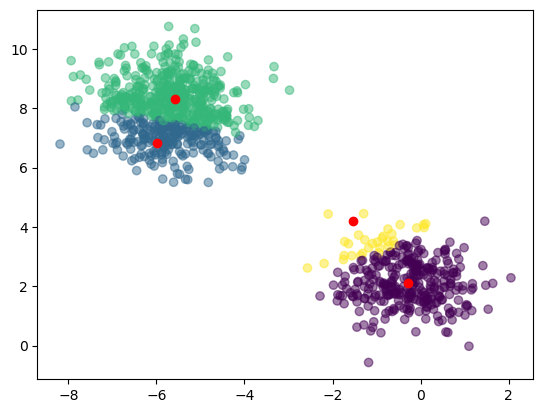

iter = 3


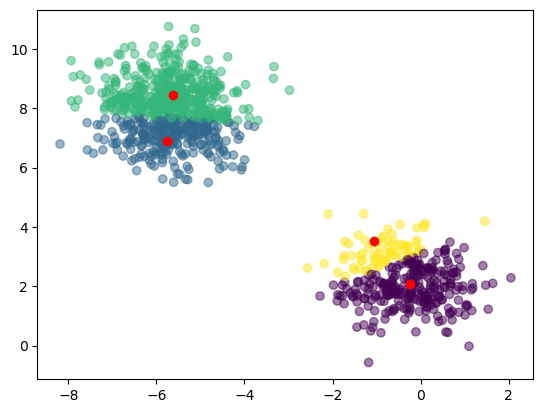

iter = 4


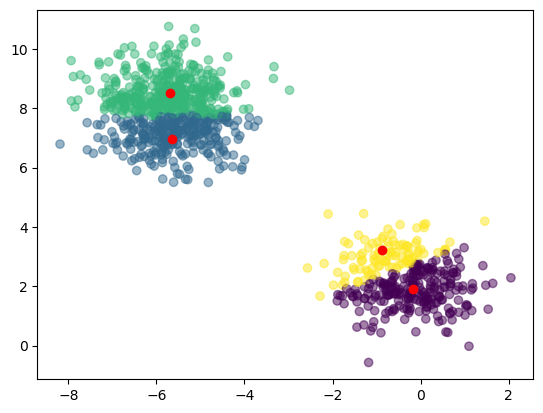

iter = 5


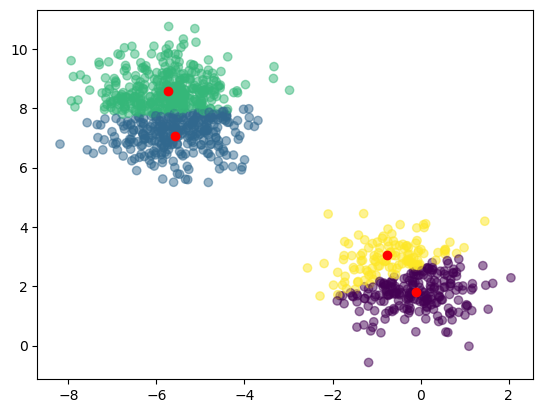

iter = 6


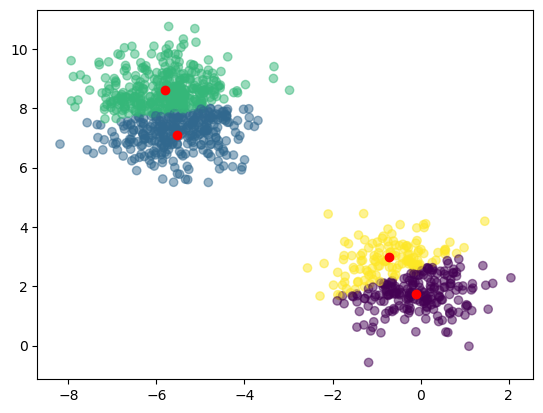

iter = 7


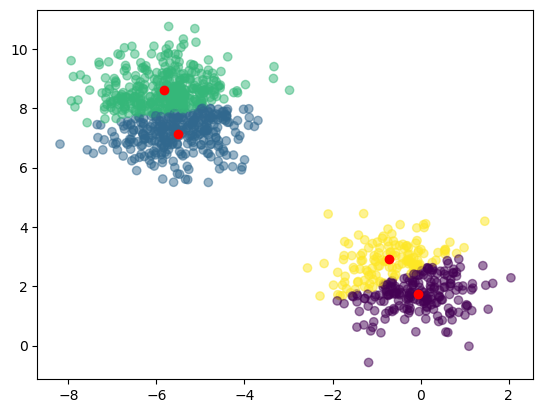

iter = 8


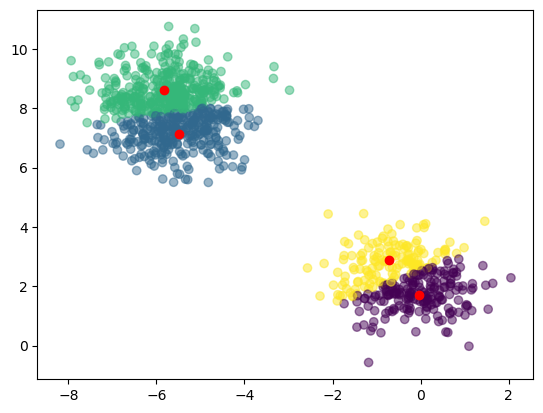

iter = 9


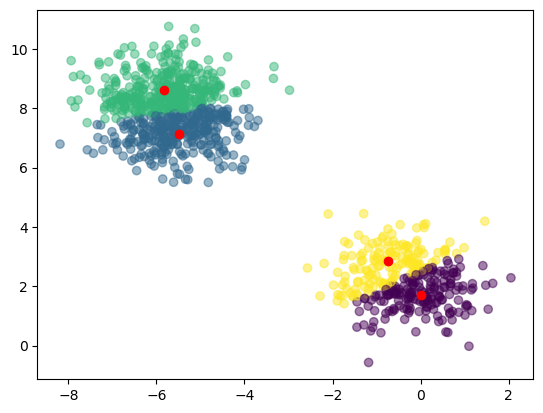

iter = 10


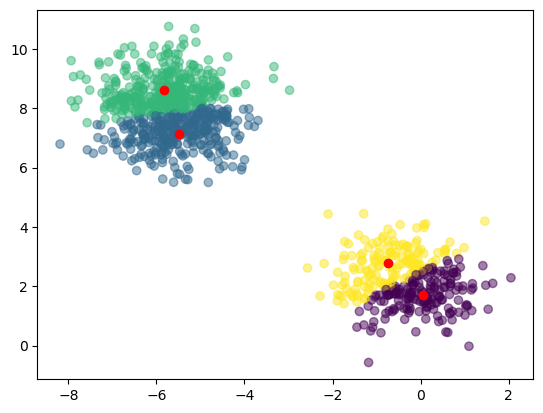

iter = 11


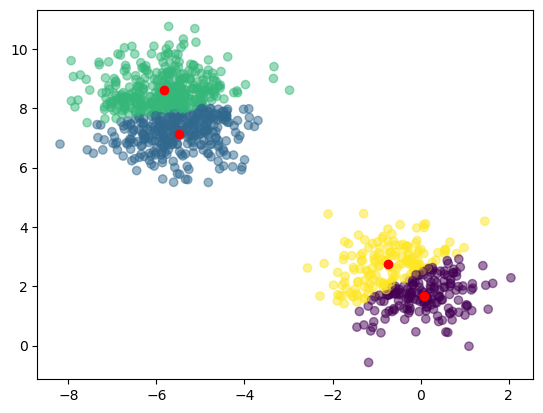

iter = 12


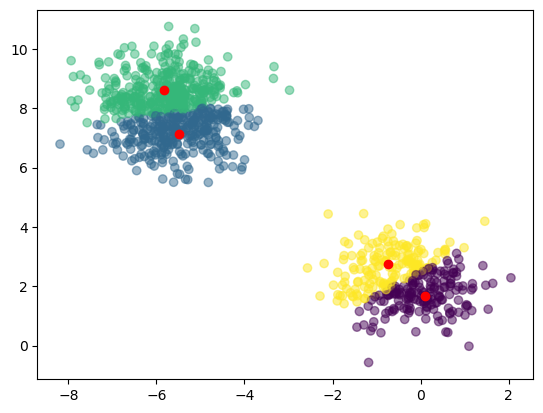

iter = 13


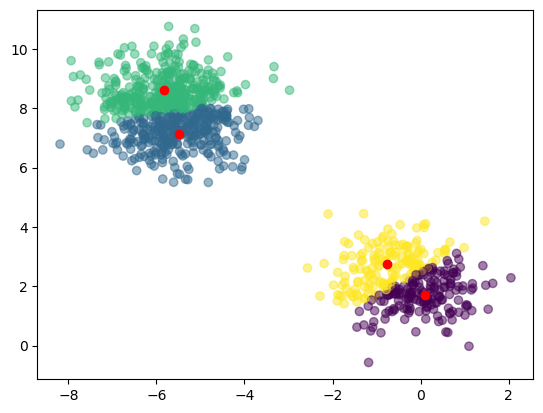

iter = 14


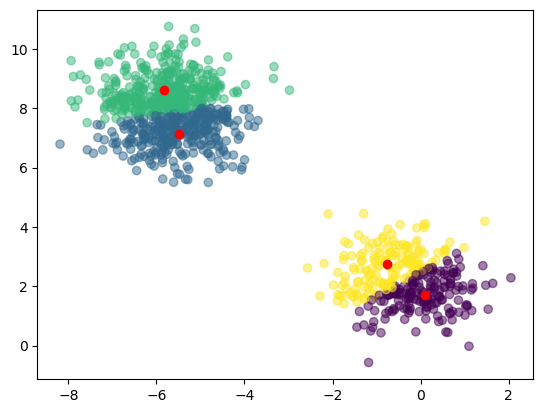

iter = 15


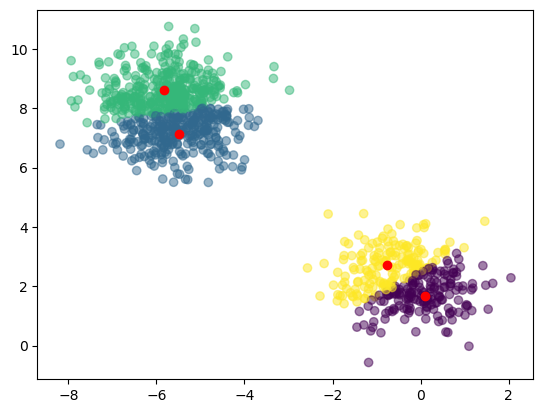

iter = 16


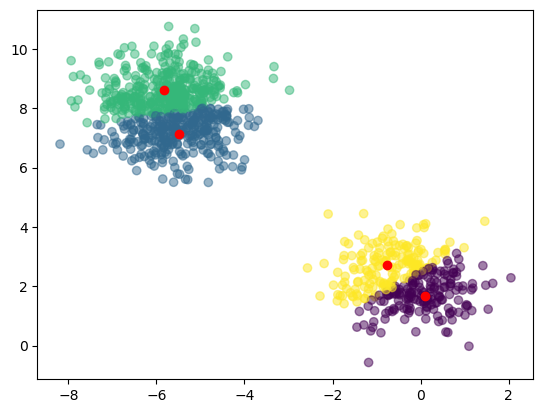

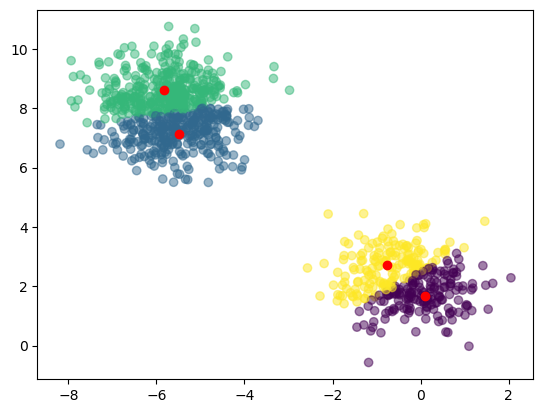

return centroids = [[0.10555045194602826, 1.6868486300533443], [-5.488671113998336, 7.125715839122681], [-5.829621560079481, 8.628004540889302], [-0.7578317018965282, 2.7287332264089823]]
final iteration = 16


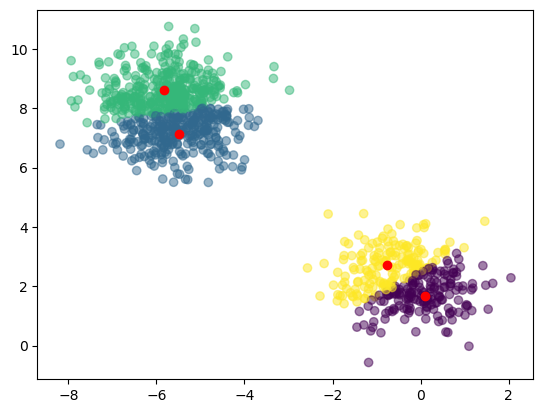

least = -81.87268936306536, maximum = 20.5123878539762
least = -81.87268936306536, maximum = 20.5123878539762
least = -81.87268936306536, maximum = 20.5123878539762
least = -81.87268936306536, maximum = 20.5123878539762
least = -81.87268936306536, maximum = 20.5123878539762
least = -5.711024361711026, maximum = 107.57341898674059
least = -5.711024361711026, maximum = 107.57341898674059
least = -5.711024361711026, maximum = 107.57341898674059
least = -5.711024361711026, maximum = 107.57341898674059
least = -5.711024361711026, maximum = 107.57341898674059
generated centroids = [[-3.8, 1.3], [-0.8, 1.0], [0.0, 0.8], [-4.9, 9.5], [-7.7, 3.5]]
iter = 0


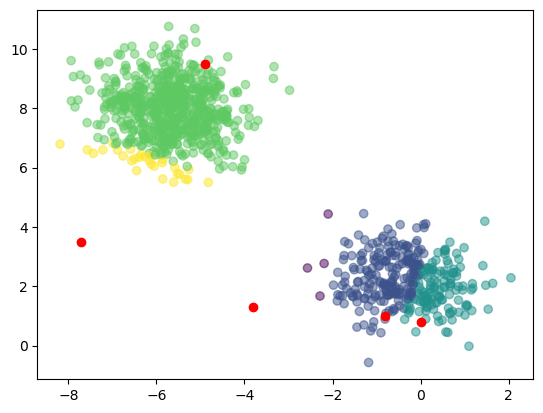

iter = 1


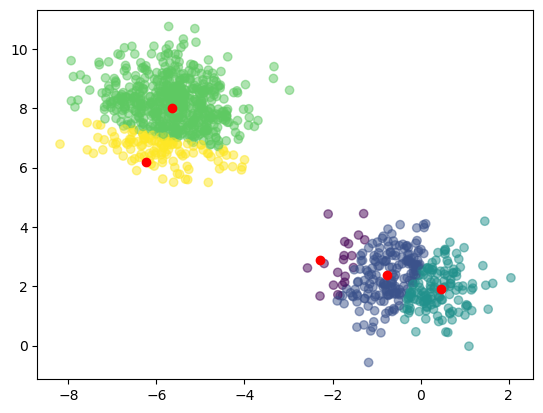

iter = 2


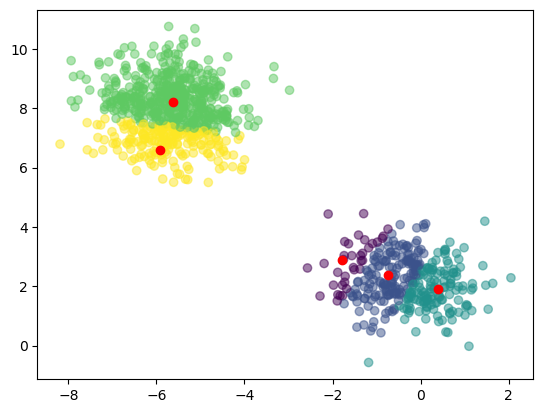

iter = 3


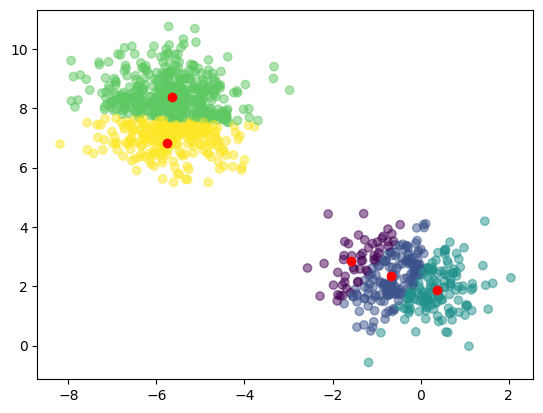

iter = 4


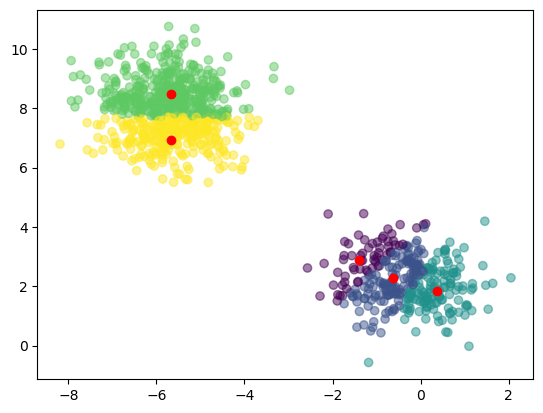

iter = 5


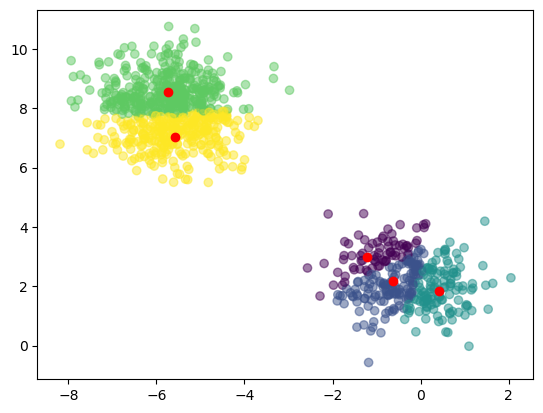

iter = 6


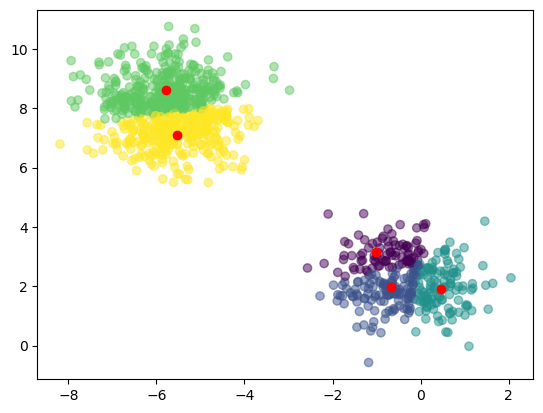

iter = 7


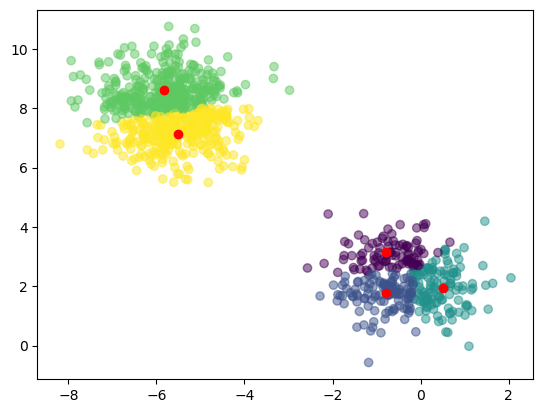

iter = 8


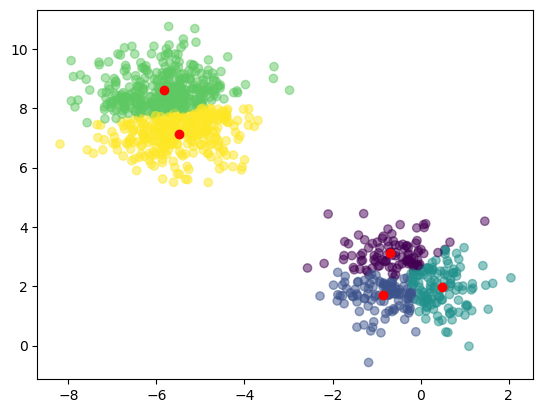

iter = 9


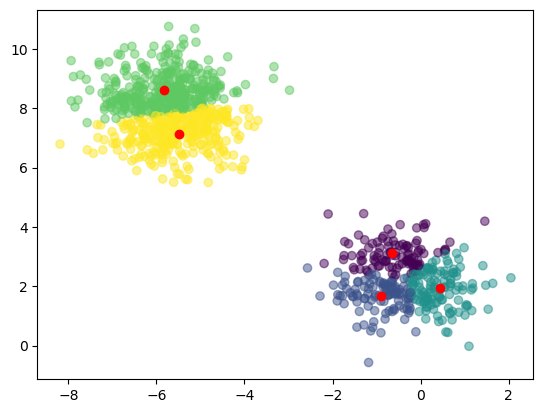

iter = 10


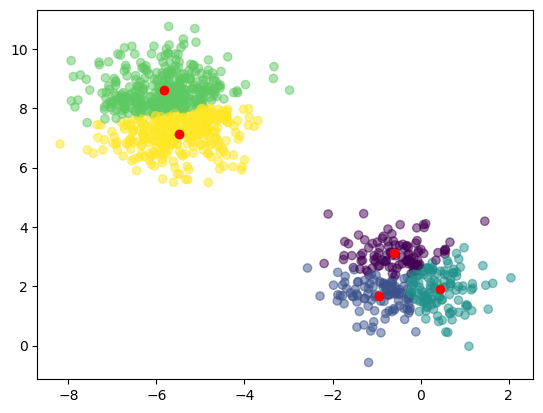

iter = 11


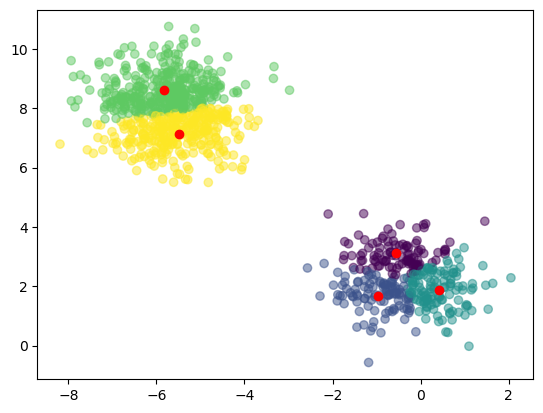

iter = 12


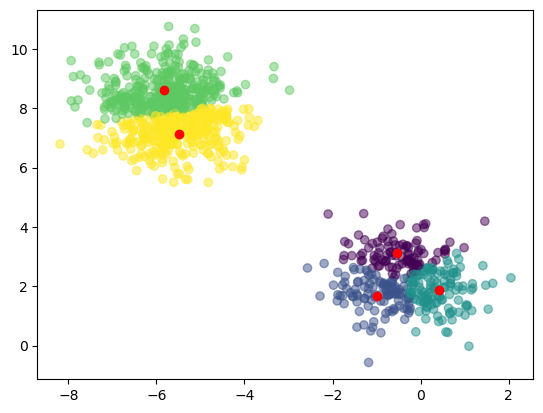

iter = 13


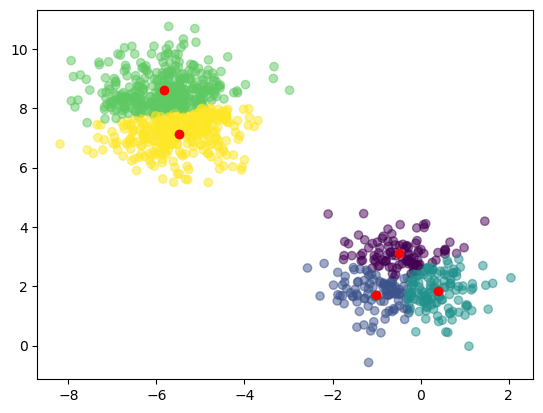

iter = 14


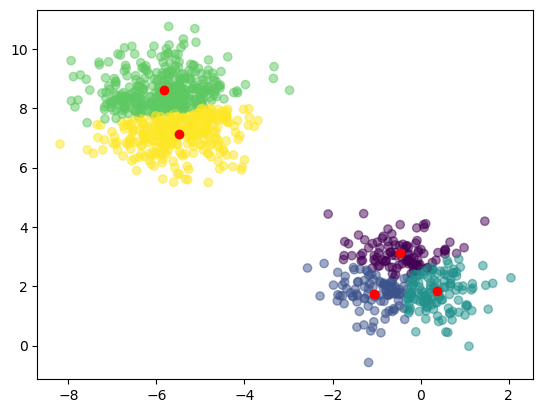

iter = 15


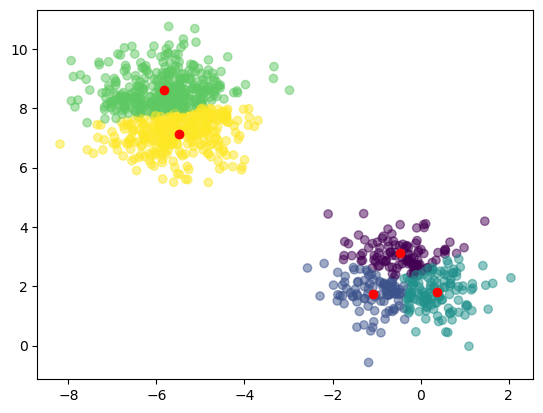

iter = 16


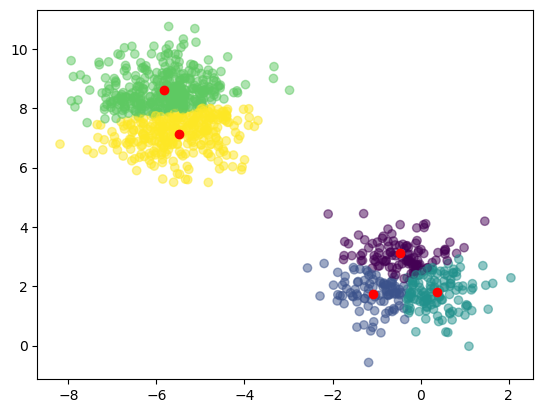

iter = 17


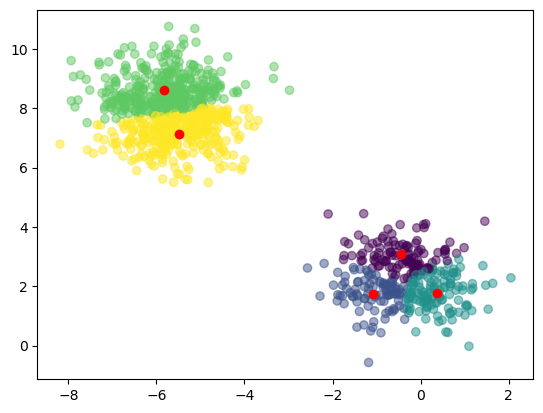

iter = 18


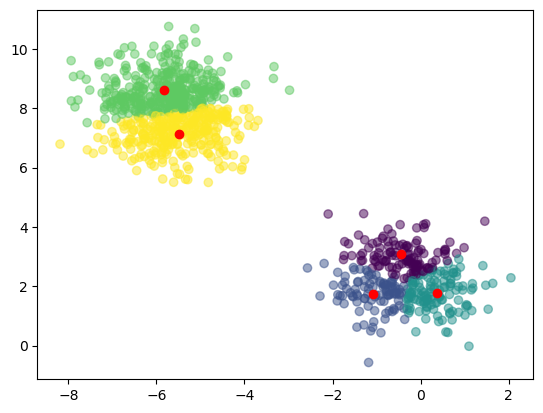

iter = 19


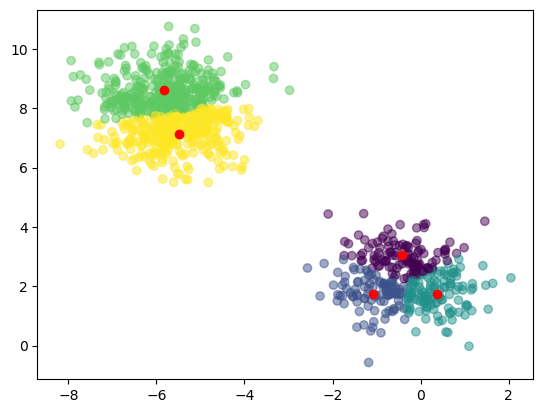

iter = 20


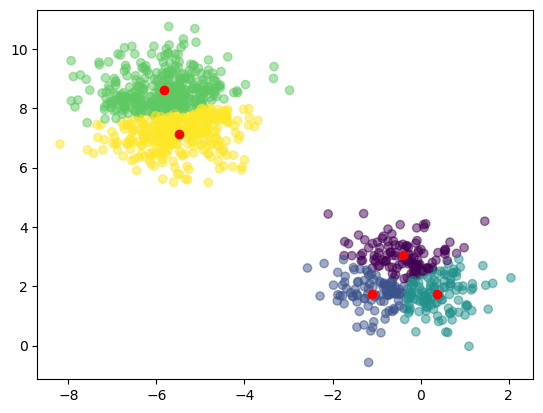

iter = 21


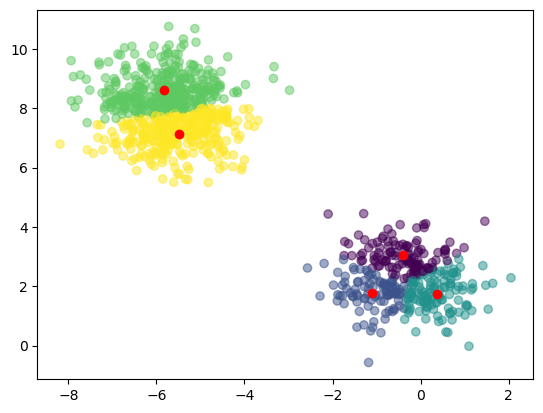

iter = 22


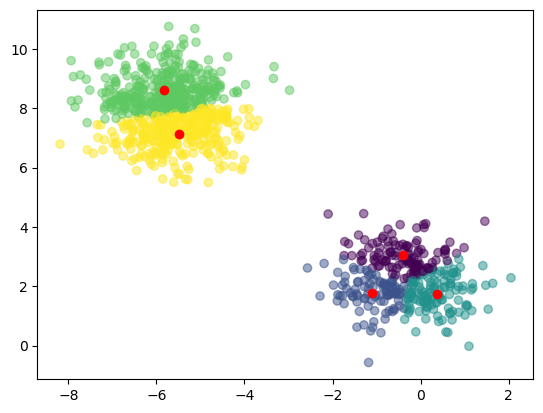

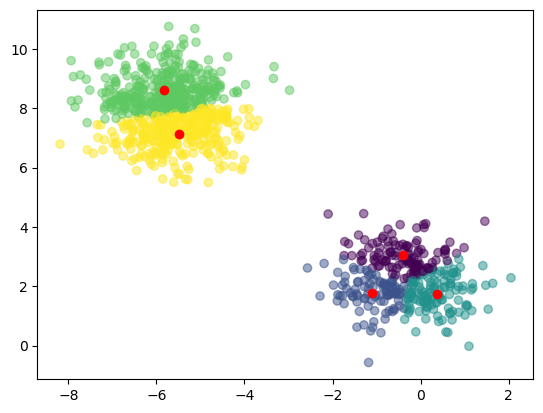

return centroids = [[-0.40982854636050203, 3.0655096477399244], [-1.1039491566138078, 1.7634549920472633], [0.3760422812022026, 1.7384543783024367], [-5.829621560079481, 8.628004540889302], [-5.488671113998336, 7.125715839122681]]
final iteration = 22


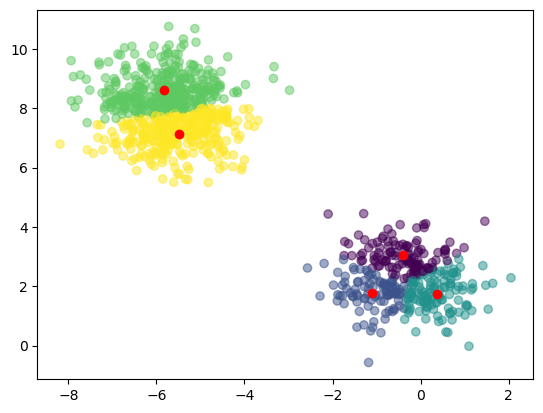

[2191.1106729743697,
 296.1710389017635,
 231.0850642320264,
 203.23192046285772,
 188.54486130585894]

In [14]:
inertias = []
for i in range(1, 6):
    cent = generateCentroids(i, X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max())
    X = X.tolist()
    model = KMeans(i, X, cent)
    model.setCentroid()
    model.calInertia()
    inertias.append(model.inertia)
    X = np.array(X)
inertias

In [15]:
inertias

[2191.1106729743697,
 296.1710389017635,
 231.0850642320264,
 203.23192046285772,
 188.54486130585894]

Text(0.5, 1.0, 'ELBOW')

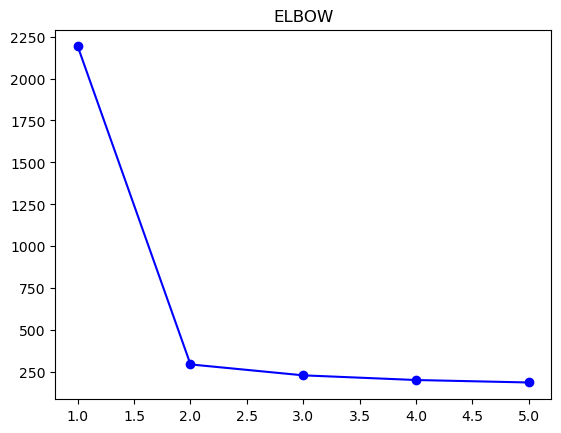

In [16]:
plt.plot(range(1, 6), inertias, 'bo-')
plt.title("ELBOW")